In [1]:
import matplotlib.pyplot as plt
import numpy as np
import onnxruntime as ort
import soundfile as sf

from streamsad import FeatureExtractor

In [2]:
x, fs = sf.read("../tests/data/George-crop2.wav")
feature_extractor = FeatureExtractor()
spect = feature_extractor(x)
state = np.zeros((1, 1, 64), dtype=np.float32)


In [3]:
model_fp32 = "../src/streamsad/models/model_2025-06-10.onnx"
model_dynamic_int8 = "model_2025-06-10_dynamic_int8.onnx"
model_static_int8 = "model_2025-06-10_static_int8.onnx"

ort_session_fp32 = ort.InferenceSession(model_fp32)
ort_session_int8_dynamic = ort.InferenceSession(model_dynamic_int8)
ort_session_int8_static = ort.InferenceSession(model_static_int8)

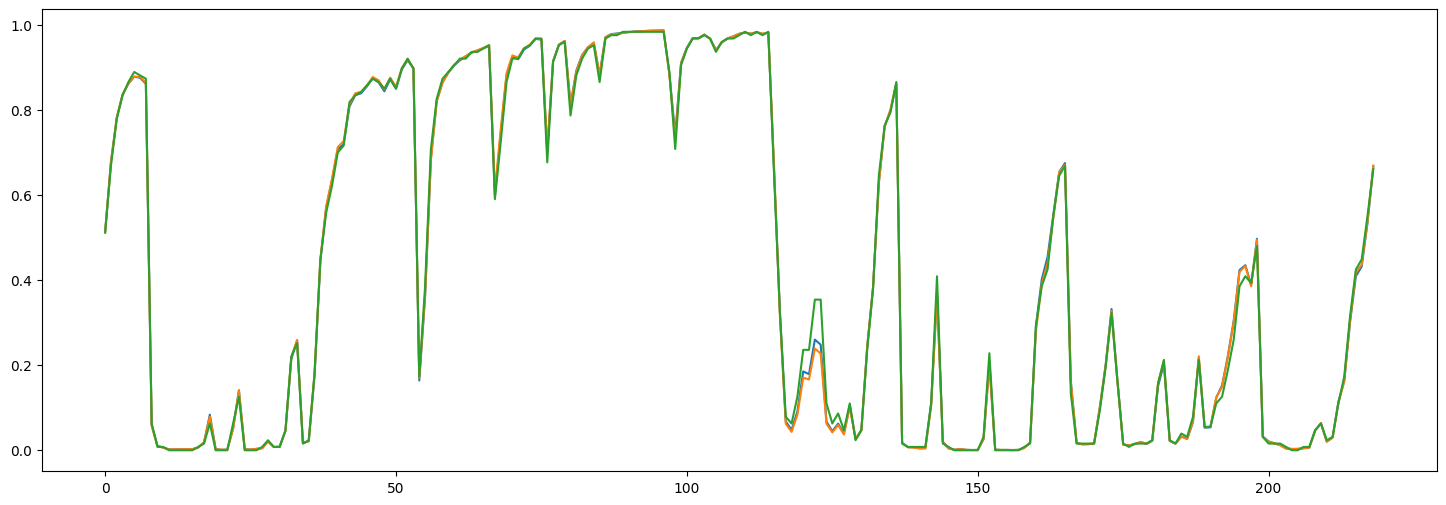

In [6]:
plt.figure(figsize=(18, 6))

raw_output_fp32, _ = ort_session_fp32.run(
    None,
    {"input": spect, "input_state": state},
)
plt.plot(raw_output_fp32[0, ..., 0], label="FP32")

raw_output_int8_dynamic, _ = ort_session_int8_dynamic.run(
    None,
    {"input": spect, "input_state": state},
)
plt.plot(raw_output_int8_dynamic[0, ..., 0], label="INT8D")

raw_output_int8_static, _ = ort_session_int8_static.run(
    None,
    {"input": spect, "input_state": state},
)
plt.plot(raw_output_int8_static[0, ..., 0], label="INT8S")